In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings("ignore")

In [7]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [5]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
boston_df['Price'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
boston_df.corr()['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

<AxesSubplot:>

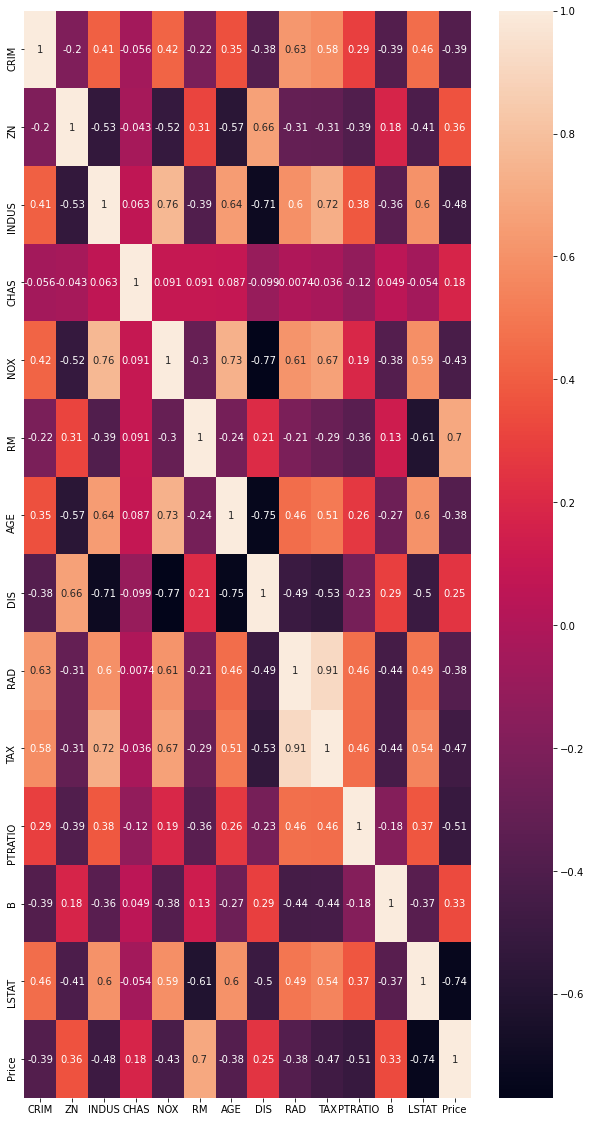

In [12]:
plt.figure(figsize=(10,20))
sns.heatmap(boston_df.corr(),annot=True)

In [13]:
X = boston_df.drop(['Price'],axis=1)
y = boston_df['Price']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 17)

In [15]:
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (354, 13)
The dimension of X_test is (152, 13)


In [17]:
print(f"The dimension of X_train is {X_train.shape}")

The dimension of X_train is (354, 13)


In [24]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[ 5.34825922, -0.45850446,  0.9625164 , ...,  0.79887187,
        -3.82468862, -0.38754387],
       [-0.42500818, -0.45850446,  0.19347119, ...,  0.11346072,
         0.20823582, -0.1330972 ],
       [-0.24909041, -0.45850446,  1.17849114, ..., -1.71430236,
         0.19888878,  0.15828527],
       ...,
       [ 0.02702584, -0.45850446,  1.17849114, ..., -1.71430236,
         0.46082345,  1.84365244],
       [-0.42448893,  0.84992423, -0.95936697, ..., -0.8461149 ,
         0.43604291, -0.07427351],
       [-0.42508624, -0.45850446, -0.21804825, ..., -0.29778598,
         0.4465855 , -0.3807039 ]])

In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)

train_score_lr = lr.score(X_train,y_train)
test_score_lr = lr.score(X_test,y_test)

print(f"The dimension of X_train is {train_score_lr}")
print(f"The dimension of X_test is {test_score_lr}")

The dimension of X_train is 0.7295579805153971
The dimension of X_test is 0.7620882852026807


In [26]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train,y_train)

train_score_ridge_reg = ridge_reg.score(X_train,y_train)
test_score_ridge_reg = ridge_reg.score(X_test,y_test)

print(f"The dimension of X_train is {train_score_ridge_reg}")
print(f"The dimension of X_test is {test_score_ridge_reg}")

The dimension of X_train is 0.7279065241477742
The dimension of X_test is 0.7615520943509012


In [27]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train,y_train)

train_score_lasso_reg = ridge_reg.score(X_train,y_train)
test_score_lasso_reg = ridge_reg.score(X_test,y_test)

print(f"The dimension of X_train is {train_score_lasso_reg}")
print(f"The dimension of X_test is {test_score_lasso_reg}")

The dimension of X_train is 0.7279065241477742
The dimension of X_test is 0.7615520943509012
